In [1]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
import scipy.stats as stats

# Extract data for the two groups
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")


Reject the null hypothesis: There is a significant difference in median values.


In [3]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)
import scipy.stats as stats

# Extract data for different age groups (e.g., dividing 'AGE' into categories)
group1 = boston_df[boston_df['AGE'] < 30]['MEDV']
group2 = boston_df[(boston_df['AGE'] >= 30) & (boston_df['AGE'] < 60)]['MEDV']
group3 = boston_df[boston_df['AGE'] >= 60]['MEDV']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(group1, group2, group3)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no difference in median values.")


Reject the null hypothesis: There is a difference in median values.


In [4]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)
import scipy.stats as stats

# Extract data for nitric oxide concentrations and non-retail business acres
nitric_oxide = boston_df['NOX']
non_retail_acres = boston_df['INDUS']

# Perform the Pearson correlation test
correlation_coeff, p_value = stats.pearsonr(nitric_oxide, non_retail_acres)

if p_value > 0.05:
    print("Fail to reject the null hypothesis: There is no significant correlation.")
else:
    print("Reject the null hypothesis: There is a significant correlation.")


Reject the null hypothesis: There is a significant correlation.


In [5]:
#What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes? (Regression analysis)
import statsmodels.api as sm

# Define X (independent variable) and y (dependent variable)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

if model.pvalues[1] < 0.05:
    print("The coefficient for weighted distance is significant.")
else:
    print("The coefficient for weighted distance is not significant.")


The coefficient for weighted distance is significant.


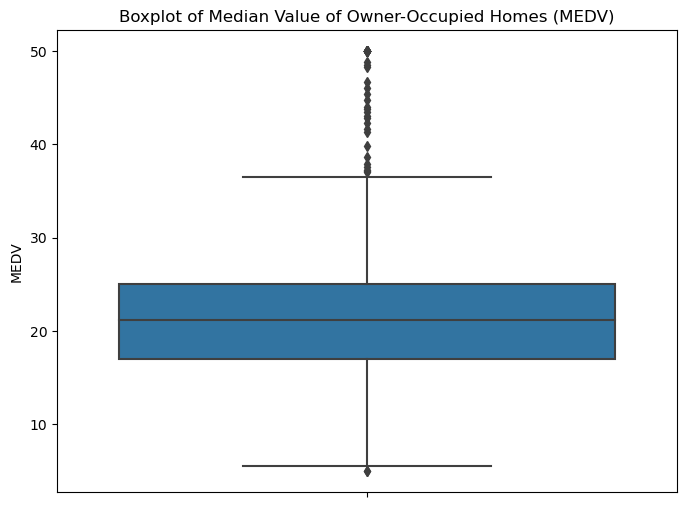

In [6]:
#For all visualizations, please include a title in each graph and appropriate labels

#Generate the following and explain your findings:

#For the "Median value of owner-occupied homes" provide a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for MEDV
sns.boxplot(data=boston_df, y='MEDV')
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV")
plt.show()


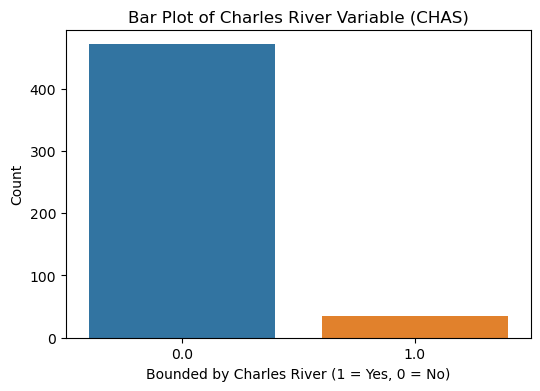

In [7]:
#Provide a  bar plot for the Charles river variable
# Count the occurrences of each category
charles_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=charles_counts.index, y=charles_counts.values)
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("Bounded by Charles River (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


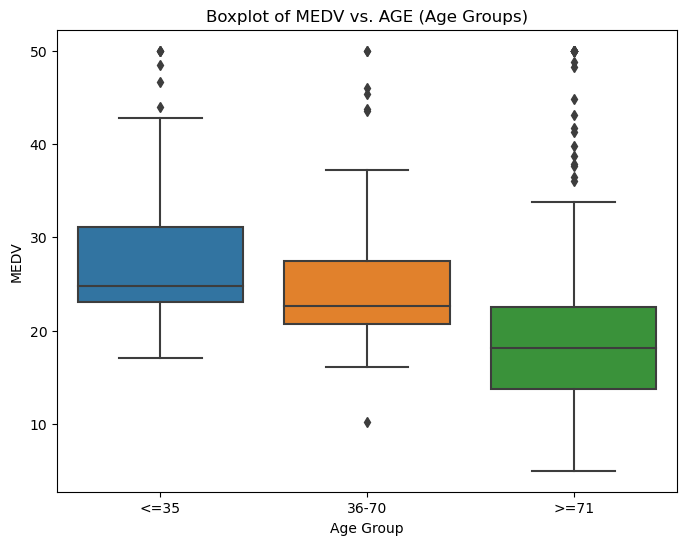

In [8]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<=35', '36-70', '>=71'])

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV')
plt.title("Boxplot of MEDV vs. AGE (Age Groups)")
plt.xlabel("Age Group")
plt.ylabel("MEDV")
plt.show()



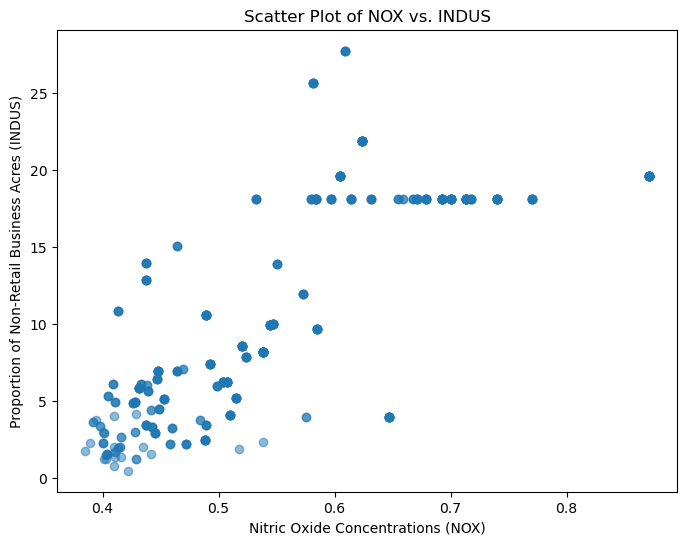

In [9]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title("Scatter Plot of NOX vs. INDUS")
plt.xlabel("Nitric Oxide Concentrations (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()


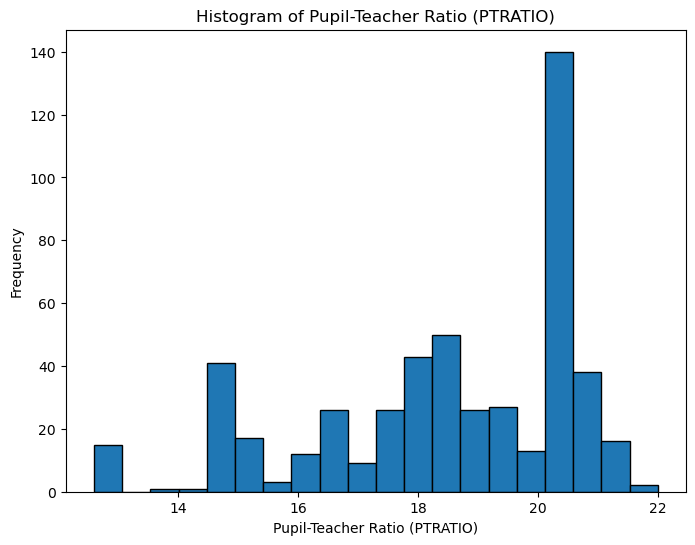

In [10]:
#Create a histogram for the pupil to teacher ratio variable
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='k')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Frequency")
plt.show()
